# Countvecotrizer

In [1]:
%config IPCompleter.greedy=True

### Import packages

In [1]:
import numpy as np  
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import *
from sklearn.metrics import average_precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier

### Training data

In [2]:
train = pd.read_csv('./emails.train.csv')
text = train['text']

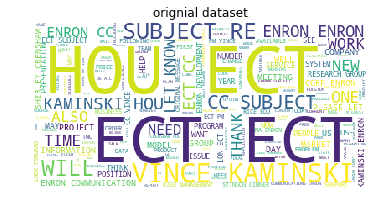

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

def wordcloud(dataframe, title=None):
    wordcloud = WordCloud(background_color="white").generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    if title is not None:
        plt.title(title)

# show the word cloud of orignial dataset.
wordcloud(train['text'], 'orignial dataset')

### Word vectorizer

In [7]:
stemmer = PorterStemmer()
analyzer = CountVectorizer(stop_words="english").build_analyzer() 

## 1. build analyzer to stem words
def stemmed_words(dataframe):
    return (stemmer.stem(w) for w in analyzer(dataframe))

## 2. create bag of words removing stop words
def bag_of_words(dataframe):
    stem_vectorizer = CountVectorizer(analyzer=stemmed_words, max_features=1000) ## adjust this parameter
    text_representation = stem_vectorizer.fit_transform(dataframe.values) 
    #print(stem_vectorizer.vocabulary_) ## vocabulary created 
    print(text_representation.toarray())
    return text_representation.toarray()
    


bag_of_words(text)
  
    

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [4 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

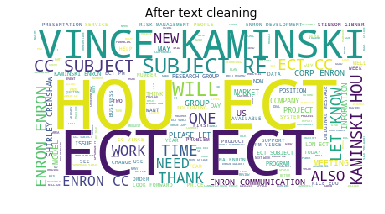

In [5]:
# Now show the word cloud after cleaning.
wordcloud(train['text'], 'After text cleaning')

# Based on the observation from this word cloud, you may add more non-meaningful words into `extras'. 

### Feature extraction

In [8]:
## data
train = pd.read_csv('./emails.train.csv')
test  = pd.read_csv('./emails.test.csv')

## labels
Y_train = train['spam'] # train labels
Y_test  = test['spam'] # test labels

print("Extracting feature for train ...")
X_train = bag_of_words(train['text']) # train features
print(X_train)

print("Extracting feature for test ...")
X_test  = bag_of_words(test['text']) # test features
print(X_test)

print('Finish.')


Extracting feature for train ...
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [4 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [4 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
Extracting feature for test ...
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
Finish.


### KNN Classifier

In [7]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [1, 2, 5],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn,params,n_jobs=1)

grid_search.fit(X_train, Y_train)

print (grid_search.best_params_)
print (grid_search.best_score_)

{'n_neighbors': 2, 'p': 2}
0.92439691619


### SVM

In [8]:
svm = SVC()

svm.fit(X_train, Y_train) 

Y_pred = svm.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.76039835969537195

### Multinomial NB

In [9]:
nb = MultinomialNB()

nb.fit(X_train, Y_train)

Y_pred = nb.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.78558875219683655

### Gaussian Process Classifier

In [11]:
gp = GaussianProcessClassifier()

gp.fit(X_train, Y_train)

Y_pred = gp.predict(X_test)


accuracy_score(Y_test, Y_pred)

0.6373755125951962